In [1]:
import pandas as pd
test_df = pd.read_csv("MongoDB_70_Test_inference.csv")
test_df

,Unnamed: 0,text,label,pred
0,1026,i have a replicaset with the primary running m...,1,1
1,1460,hi this is my first jira ticket so please forg...,1,1
2,1113,what problem are you facing i updated from v t...,1,1
3,707,introduced here after a network read error the...,1,1
4,857,hello compass allows transforming a document f...,0,1
...,...,...,...,...
1267,1130,the secondaryreadspassthrough task on runs mon...,0,0
1268,1294,engineering ticket descriptioni get better thr...,0,0
1269,860,hi i have implemented the lab through mongo un...,1,1
1270,1459,im not sure what the impact of this could be b...,0,0


In [2]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(test_df["label"].values, test_df["pred"].values)

print(cf_matrix)

[[428 212]
 [227 405]]


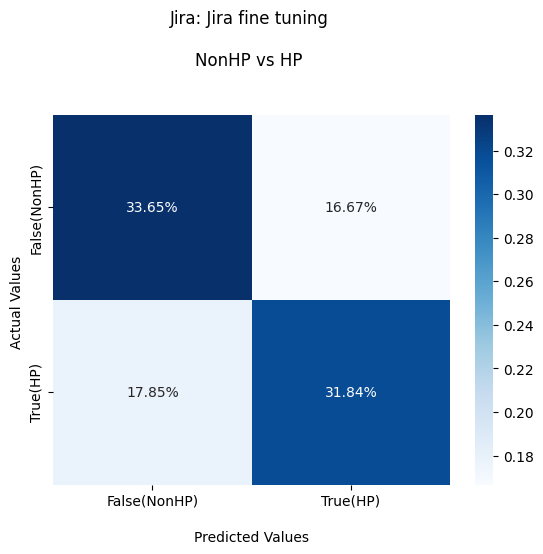

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Jira: Jira fine tuning \n\nNonHP vs HP \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False(NonHP)','True(HP)'])
ax.yaxis.set_ticklabels(['False(NonHP)','True(HP)'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [4]:
from sklearn.metrics import classification_report


print(classification_report(test_df["label"].values, test_df["pred"].values))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       640
           1       0.66      0.64      0.65       632

    accuracy                           0.65      1272
   macro avg       0.65      0.65      0.65      1272
weighted avg       0.65      0.65      0.65      1272



In [5]:
from sklearn.metrics import matthews_corrcoef

# Calculate the Matthew's Correlation Coefficient
mcc = matthews_corrcoef(test_df["label"].values, test_df["pred"].values)
print("Matthew's Correlation Coefficient:", mcc)

Matthew's Correlation Coefficient: 0.3097048939157475
